In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
# 폰트지정
plt.rcParams['font.family'] = 'NanumGothic'

# 마이너스 부호 깨짐 지정
plt.rcParams['axes.unicode_minus'] = False

# 숫자가 지수표현식으로 나올 때 지정
pd.options.display.float_format = '{:.2f}'.format

In [3]:
# 데이터 로드
file_path = 'dataset/seoul_pm10.csv'
df = pd.read_csv(file_path, encoding='cp949')

In [4]:
print('데이터 크기:', df.shape)
print('\n처음 5개 행:')
display(df.head())

데이터 크기: (227759, 4)

처음 5개 행:


,date,area,pm10,pm2.5
0,2022-12-31 23:00,강남구,57.00,44.00
1,2022-12-31 23:00,강동구,68.00,55.00
2,2022-12-31 23:00,강북구,59.00,42.00
3,2022-12-31 23:00,강서구,62.00,40.00
4,2022-12-31 23:00,관악구,57.00,38.00


In [5]:
# 기본 데이터 정보 확인
print("\n데이터 기간:", df['date'].min(), "~", df['date'].max())
print("총 관측 수:", len(df))
print("지역 수:", df['area'].nunique())
print("\n결측치 개수:")
display(df.isnull().sum())


데이터 기간: 2022-01-01 0:00 ~ 2022-12-31 9:00
총 관측 수: 227759
지역 수: 26

결측치 개수:


date        0
area        0
pm10     4916
pm2.5    4247
dtype: int64

In [6]:
# 데이터 전처리
# 날짜 변환
df['date'] = pd.to_datetime(df['date'])

In [7]:
df.head()

,date,area,pm10,pm2.5
0,2022-12-31 23:00:00,강남구,57.00,44.00
1,2022-12-31 23:00:00,강동구,68.00,55.00
2,2022-12-31 23:00:00,강북구,59.00,42.00
3,2022-12-31 23:00:00,강서구,62.00,40.00
4,2022-12-31 23:00:00,관악구,57.00,38.00


In [8]:
# 결측치 처리
df['pm10'] = df['pm10'].fillna(df['pm10'].mean())
df['pm2.5'] = df['pm2.5'].fillna(df['pm2.5'].mean())

In [9]:
# 시간 관련 피처 추가
df['hour'] = df['date'].dt.hour
df['day_of_week'] = df['date'].dt.dayofweek
df['month'] = df['date'].dt.month

In [10]:
df.head()

,date,area,pm10,pm2.5,hour,day_of_week,month
0,2022-12-31 23:00:00,강남구,57.00,44.00,23,5,12
1,2022-12-31 23:00:00,강동구,68.00,55.00,23,5,12
2,2022-12-31 23:00:00,강북구,59.00,42.00,23,5,12
3,2022-12-31 23:00:00,강서구,62.00,40.00,23,5,12
4,2022-12-31 23:00:00,관악구,57.00,38.00,23,5,12


In [11]:
# 지역 원-핫 인코딩
df_encoded = pd.get_dummies(df, columns=['area'], prefix='area')

In [12]:
# 전처리된 데이터 확인
print("\n전처리된 데이터 샘플:")
display(df_encoded.head())


전처리된 데이터 샘플:


,date,pm10,pm2.5,hour,day_of_week,month,area_강남구,area_강동구,area_강북구,area_강서구,...,area_성북구,area_송파구,area_양천구,area_영등포구,area_용산구,area_은평구,area_종로구,area_중구,area_중랑구,area_평균
0,2022-12-31 23:00:00,57.00,44.00,23,5,12,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2022-12-31 23:00:00,68.00,55.00,23,5,12,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2022-12-31 23:00:00,59.00,42.00,23,5,12,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,2022-12-31 23:00:00,62.00,40.00,23,5,12,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,2022-12-31 23:00:00,57.00,38.00,23,5,12,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
# PM10 모델 학습
features_pm10 = ['pm2.5', 'hour', 'day_of_week', 'month'] + [col for col in df_encoded.columns if col.startswith('area_')]
X_pm10 = df_encoded[features_pm10]
y_pm10 = df_encoded['pm10']

In [14]:
# PM2.5 모델 학습
features_pm25 = ['pm10', 'hour', 'day_of_week', 'month'] + [col for col in df_encoded.columns if col.startswith('area_')]
X_pm25 = df_encoded[features_pm25]
y_pm25 = df_encoded['pm2.5']

In [15]:
# 데이터 분할
X_train_pm10, X_test_pm10, y_train_pm10, y_test_pm10 = train_test_split(X_pm10, y_pm10, test_size=0.2, random_state=42)
X_train_pm25, X_test_pm25, y_train_pm25, y_test_pm25 = train_test_split(X_pm25, y_pm25, test_size=0.2, random_state=42)

In [16]:
# 모델 학습
model_pm10 = LinearRegression()
model_pm25 = LinearRegression()

In [17]:
model_pm10.fit(X_train_pm10, y_train_pm10)
model_pm25.fit(X_train_pm25, y_train_pm25)

LinearRegression()

In [18]:
# 모델 평가
y_pred_pm10 = model_pm10.predict(X_test_pm10)
y_pred_pm25 = model_pm25.predict(X_test_pm25)

In [19]:
print("\nPM10 모델 성능:")
print(f"R² Score: {r2_score(y_test_pm10, y_pred_pm10):.4f}")
print(f"MSE: {mean_squared_error(y_test_pm10, y_pred_pm10):.4f}")


PM10 모델 성능:
R² Score: 0.6079
MSE: 198.3575


In [20]:
print("\nPM2.5 모델 성능:")
print(f"R² Score: {r2_score(y_test_pm25, y_pred_pm25):.4f}")
print(f"MSE: {mean_squared_error(y_test_pm25, y_pred_pm25):.4f}")


PM2.5 모델 성능:
R² Score: 0.6136
MSE: 73.9499


In [21]:
# 2023년 1월 1일 예측을 위한 함수
def create_prediction_data(area):
  predictions = []
  for hour in range(24):
    pred_data = {
      'hour': hour,
      'day_of_week': 6,  # 2023년 1월 1일은 일요일
      'month': 1
    }

    # 지역 원-핫 인코딩 추가
    for area_col in [col for col in df_encoded.columns if col.startswith('area_')]:
      pred_data[area_col] = 1 if area_col == f'area_{area}' else 0

    predictions.append(pred_data)

  return pd.DataFrame(predictions)

In [22]:
# 사용자 입력 - 지역 선택
areas = sorted(df['area'].unique())
print("\n예측 가능한 지역:")
display(areas)


예측 가능한 지역:


['강남구',
 '강동구',
 '강북구',
 '강서구',
 '관악구',
 '광진구',
 '구로구',
 '금천구',
 '노원구',
 '도봉구',
 '동대문구',
 '동작구',
 '마포구',
 '서대문구',
 '서초구',
 '성동구',
 '성북구',
 '송파구',
 '양천구',
 '영등포구',
 '용산구',
 '은평구',
 '종로구',
 '중구',
 '중랑구',
 '평균']

In [23]:
# 예시로 한 지역 선택 (실제로는 사용자가 선택)
selected_area = areas[0]  # 첫 번째 지역 선택
print(f"\n선택된 지역: {selected_area}")


선택된 지역: 강남구


In [24]:
# 2023년 1월 1일 예측
future_data = create_prediction_data(selected_area)
pm10_predictions = []
pm25_predictions = []

In [25]:
# 반복 예측 (PM10과 PM2.5 상호 의존성 처리)
for hour in range(24):
  hour_data = future_data.iloc[[hour]].copy()

  # 초기값 설정
  hour_data['pm2.5'] = df['pm2.5'].mean()
  hour_data['pm10'] = df['pm10'].mean()

  # 반복 예측으로 정확도 향상
  for _ in range(3):
    pm10_pred = model_pm10.predict(hour_data[features_pm10])
    pm25_pred = model_pm25.predict(hour_data[features_pm25])

    hour_data['pm10'] = pm10_pred
    hour_data['pm2.5'] = pm25_pred

  pm10_predictions.append(pm10_pred[0])
  pm25_predictions.append(pm25_pred[0])

In [26]:
# 예측 결과 시각화
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

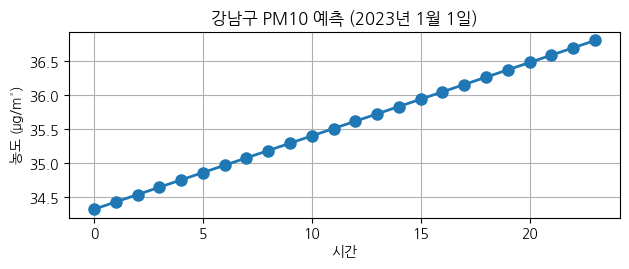

In [27]:
# PM10 그래프
plt.subplot(2, 1, 1)
plt.plot(range(24), pm10_predictions, marker='o', linewidth=2, markersize=8)
plt.title(f'{selected_area} PM10 예측 (2023년 1월 1일)')
plt.xlabel('시간')
plt.ylabel('농도 (μg/m³)')
plt.grid(True)
plt.tight_layout()
plt.show()

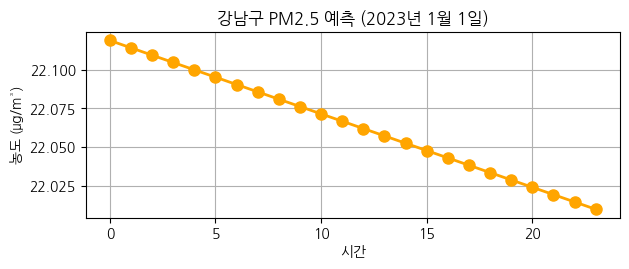

In [28]:
# PM2.5 그래프
plt.subplot(2, 1, 2)
plt.plot(range(24), pm25_predictions, marker='o', linewidth=2, markersize=8, color='orange')
plt.title(f'{selected_area} PM2.5 예측 (2023년 1월 1일)')
plt.xlabel('시간')
plt.ylabel('농도 (μg/m³)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [29]:
# 예측 결과 통계
print("\nPM10 예측 통계:")
print(f"평균: {np.mean(pm10_predictions):.1f} μg/m³")
print(f"최대: {np.max(pm10_predictions):.1f} μg/m³")
print(f"최소: {np.min(pm10_predictions):.1f} μg/m³")


PM10 예측 통계:
평균: 35.6 μg/m³
최대: 36.8 μg/m³
최소: 34.3 μg/m³


In [30]:
print("\nPM2.5 예측 통계:")
print(f"평균: {np.mean(pm25_predictions):.1f} μg/m³")
print(f"최대: {np.max(pm25_predictions):.1f} μg/m³")
print(f"최소: {np.min(pm25_predictions):.1f} μg/m³")


PM2.5 예측 통계:
평균: 22.1 μg/m³
최대: 22.1 μg/m³
최소: 22.0 μg/m³


In [32]:
# 시간별 예측값 데이터프레임 생성
hourly_predictions = pd.DataFrame({
  '시간': range(24),
  'PM10': [f"{x:.1f}" for x in pm10_predictions],
  'PM2.5': [f"{x:.1f}" for x in pm25_predictions]
})

In [33]:
print("\n시간별 예측값:")
display(hourly_predictions)


시간별 예측값:


,시간,PM10,PM2.5
0,0,34.3,22.1
1,1,34.4,22.1
2,2,34.5,22.1
3,3,34.6,22.1
4,4,34.8,22.1
5,5,34.9,22.1
6,6,35.0,22.1
7,7,35.1,22.1
8,8,35.2,22.1
9,9,35.3,22.1


In [34]:
# 실제값과 예측값 비교 시각화 (테스트 데이터 기준)
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

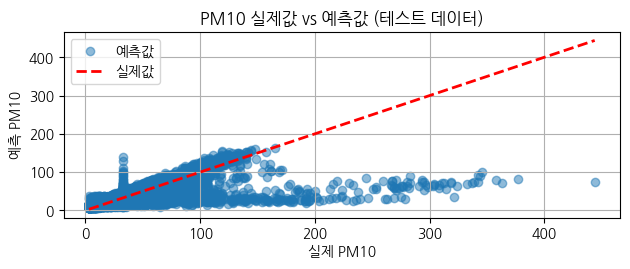

In [40]:
# PM10 비교
plt.subplot(2, 1, 1)
plt.scatter(y_test_pm10, y_pred_pm10, alpha=0.5, label='예측값')
plt.plot([y_test_pm10.min(), y_test_pm10.max()],
        [y_test_pm10.min(), y_test_pm10.max()],
        'r--', lw=2, label='실제값')
plt.xlabel('실제 PM10')
plt.ylabel('예측 PM10')
plt.title('PM10 실제값 vs 예측값 (테스트 데이터)')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

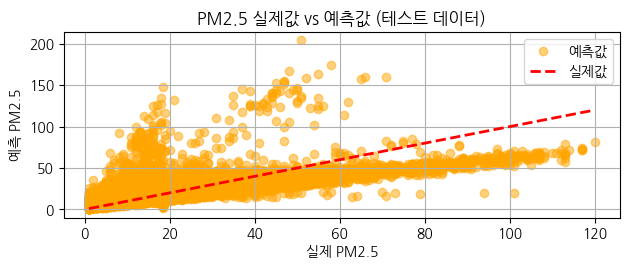

In [38]:
# PM2.5 비교
plt.subplot(2, 1, 2)
plt.scatter(y_test_pm25, y_pred_pm25, alpha=0.5, color='orange',label='예측값')
plt.plot([y_test_pm25.min(), y_test_pm25.max()],
        [y_test_pm25.min(), y_test_pm25.max()],
        'r--', lw=2, label='실제값')
plt.xlabel('실제 PM2.5')
plt.ylabel('예측 PM2.5')
plt.title('PM2.5 실제값 vs 예측값 (테스트 데이터)')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

## 직원 퇴사예측 예제

In [41]:
# 컬럼 설명 : satisfaction_level(직원만족도점수), last_evaluation(고용주평가점수), numbers_projects(할당된 프로젝트수)
# average_monthly_hours(한달동안 직원이 일한 평균시간), time_spent_company(회사에서 근무한 연수), work_accident(근무중 사고유무무)
# promotion_last_5years(지난 5년 직원이 승진했는지 여부), Departments(부서), Salary(월급수준 낮음, 중간, 높음), left(직원퇴사 여부부)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [42]:
# 폰트지정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 마이너스 부호 깨짐 지정
plt.rcParams['axes.unicode_minus'] = False

# 숫자가 지수표현식으로 나올 때 지정
pd.options.display.float_format = '{:.2f}'.format

In [43]:
# 데이터 로드
df = pd.read_csv('dataset/HR_comma_sep.csv', encoding='cp949')

In [44]:
# 데이터 확인
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [45]:
# 'left' 열이 정수형인지 확인하고 필요시 변환
if df['left'].dtype != 'int64':
    df['left'] = df['left'].astype(int)

In [46]:
# 범주형 변수 확인 및 전처리
# 'Departments ' 끝에 공백 제거
df.rename(columns={'Departments ': 'Departments'}, inplace=True)

In [47]:
# 원-핫 인코딩 (범주형 변수 처리)
df = pd.get_dummies(df, columns=['Departments', 'salary'], drop_first=True)

In [48]:
# 독립 변수(X)와 종속 변수(y) 설정
X = df.drop('left', axis=1)
y = df['left']

In [49]:
# 데이터 분할 (Train: 80%, Test: 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [51]:
# 모델 학습 - 랜덤 포레스트
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [52]:
# 예측
y_pred = model.predict(X_test_scaled)

In [53]:
# 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.99

Confusion Matrix:
[[2286    8]
 [  27  679]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2294
           1       0.99      0.96      0.97       706

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000



In [54]:
# Feature Importance (중요 변수 확인)
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

In [55]:
print("\nFeature Importances:")
print(feature_importances)


Feature Importances:
                    Feature  Importance
0        satisfaction_level        0.33
2            number_project        0.19
4        time_spend_company        0.18
3      average_montly_hours        0.14
1           last_evaluation        0.12
5             Work_accident        0.01
16               salary_low        0.01
15    Departments_technical        0.00
17            salary_medium        0.00
13        Departments_sales        0.00
14      Departments_support        0.00
7         Departments_RandD        0.00
8    Departments_accounting        0.00
6     promotion_last_5years        0.00
9            Departments_hr        0.00
10   Departments_management        0.00
11    Departments_marketing        0.00
12  Departments_product_mng        0.00
